In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("sonar.all-data.csv")

In [98]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<AxesSubplot:>

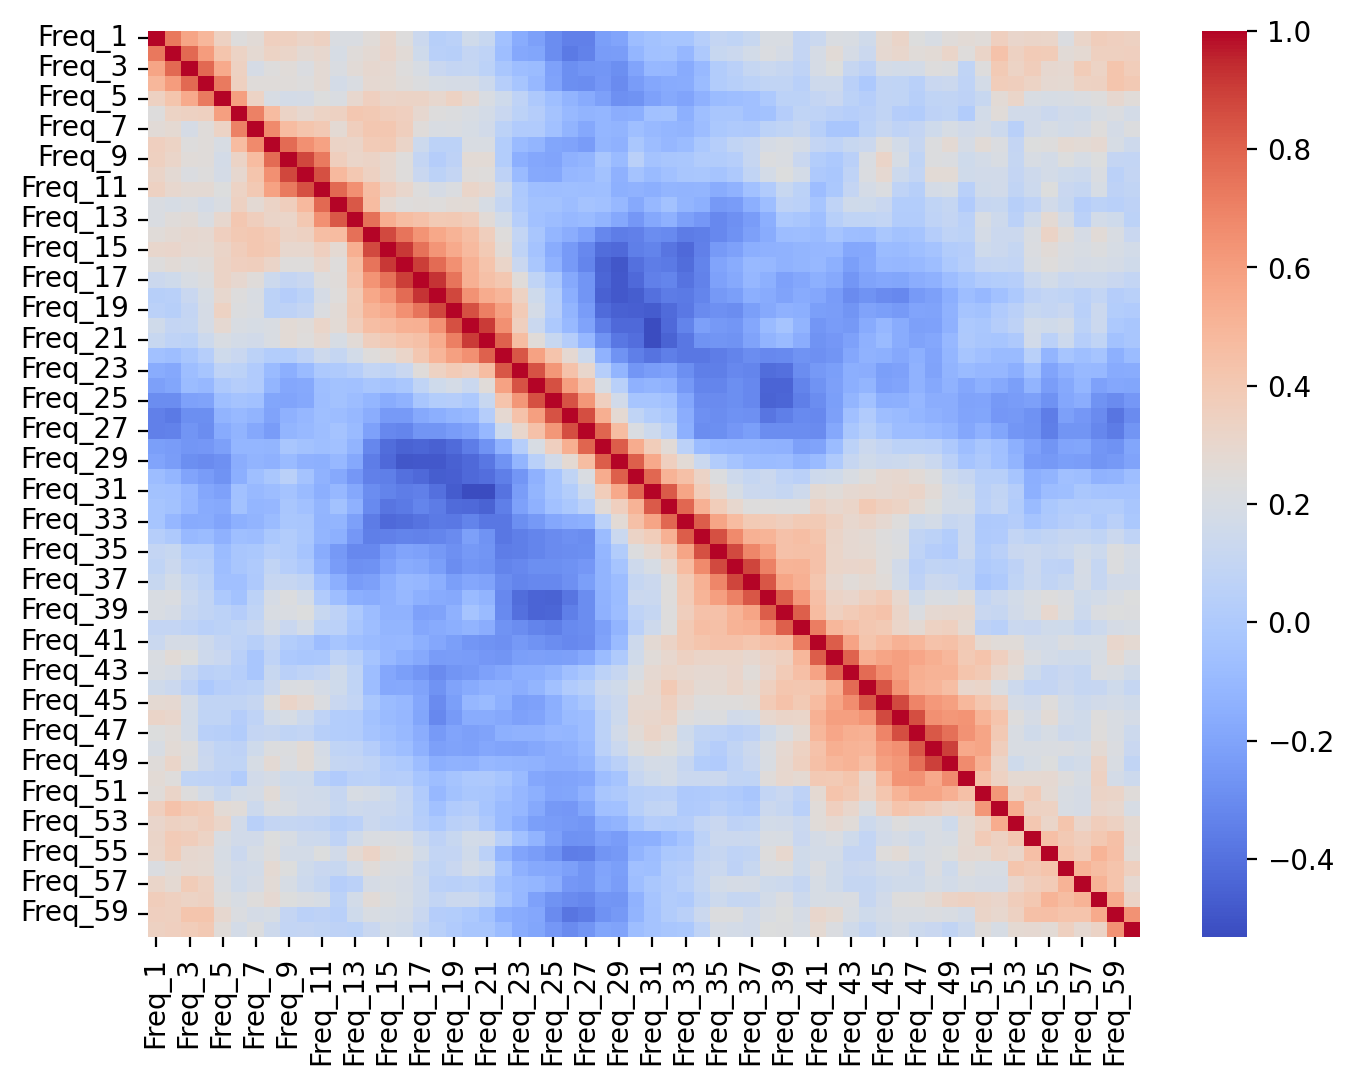

In [99]:
plt.figure(figsize = (8,6),dpi = 200)
sns.heatmap(df.corr(),cmap='coolwarm')

In [100]:
df['target'] = df['Label'].map({'R':0,'M':1})

In [101]:
np.abs(df.corr()['target']).sort_values(ascending = False)[:5]

target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Name: target, dtype: float64

## Train | Test Split on the Data

In [102]:
X = df.drop(['target','Label'],axis = 1)
y = df['Label']

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
 X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [106]:
scaler = StandardScaler()

In [107]:
knn = KNeighborsClassifier()

In [108]:
operations = [('scaler',scaler),('knn',knn)]

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
pipe = Pipeline(operations)

## We will perform grid search with the pipeline to perform varies values of k and report back the best performing performance.

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
k_values = list(range(30))

In [113]:
param_grid = {'knn__n_neighbors':k_values}

In [114]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv = 5,scoring='accuracy')

In [115]:
full_cv_classifier.fit(X_train,y_train)

C:\Users\ry363\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ry363\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ry363\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ry363\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\ry363\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ry363\anaconda3\lib\site-packages\sklearn\model_se

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19, 20, 21, 22, 23, 24, 25, 26,
                                              27, 28, 29]},
             scoring='accuracy')

In [116]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [117]:
full_cv_classifier.cv_results_['mean_test_score']

array([       nan, 0.88250356, 0.82930299, 0.85049787, 0.76486486,
       0.78634424, 0.75931721, 0.78122333, 0.73285917, 0.7487909 ,
       0.7116643 , 0.70625889, 0.70640114, 0.72759602, 0.70640114,
       0.73271693, 0.72745377, 0.72759602, 0.70611664, 0.70611664,
       0.69004267, 0.69004267, 0.69530583, 0.72716927, 0.70056899,
       0.72702703, 0.71123755, 0.71664296, 0.7059744 , 0.72731152])

Text(0, 0.5, 'Accuracy')

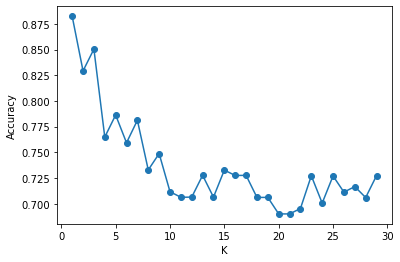

In [118]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

## Final Model Evaluation

In [119]:
pred = full_cv_classifier.predict(X_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [121]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 0,  8]], dtype=int64)

In [122]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       1.00      0.92      0.96        13
           R       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

